<a href="https://colab.research.google.com/github/raulpoppiel/sugarcane-yield-prediction/blob/main/07_outliers_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font color="green" size="6"> <b>Sugarcane Yield Prediction using RS and ML<b> </font></center>
<center><img src="https://www.omex.com/wp-content/uploads/2020/10/Sugar-Cane-Harvest-1536x772.jpg" height="150"></center>

---

_Script elaborated by **Raul Roberto Poppiel**_ ([raulpoppiel@gmail.com](raulpoppiel@gmail.com)) for the [FAPESP](https://fapesp.br/en) project Nº [23/01062-1](https://bv.fapesp.br/en/bolsas/207973/satellite-imagery-and-machine-learning-for-sugarcane-yield-estimation-in-regions-of-sao-paulo-state/), led by Professor Ana Claudia dos Santos Luciano (analuciano@usp.br) from ESALQ/USP, Brazil. The methodology employed was developed by Rafaella Pironato Amaro and is detailed in the document titled [Estimativa de produtividade da cana-de-açúcar a partir de imagens do satélite Sentinel-2A e o algoritmo de aprendizagem de máquina Random Forest](https://doi.org/10.11606/D.11.2023.tde-02102023-163947).

### Install and import tools

Data science modules

In [ ]:
# Load modules
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

print('Modules loaded')

Modules loaded


### Connect to GDrive

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Set GDrive paths

Define the output folders in GD

In [ ]:
# Define folder names
folder_name_root = 'Colab Notebooks'
folder_name_project = '01_SugarcaneYieldPrediction'
folder_name_farm = 'usinas_all'
folder_name_specific = '07_outliers_analysis'

# Define sugarcane crop-season (SAFRA)
CropSeason = 1920 # 1920, 2021, 2122, 2223

In [ ]:
# Check if the folder exists or else create
root_path = f'/content/drive/MyDrive/{folder_name_root}'
project_path = f'{root_path}/{folder_name_project}'
farm_path = f'{project_path}/{folder_name_farm}'
out_path = f'{farm_path}/{folder_name_specific}' # your results will be stored in 'out_path'

if not os.path.exists(out_path):
  Path(out_path).mkdir(parents=True, exist_ok=True)
  print("Output directory created successfully.")
else:
  print("Output directory already exists.")

os.chdir(out_path)
print(os.getcwd(),'\n')  # Print the current working directory
pd.DataFrame(os.listdir(), columns=['List files'])  # List files and directories in the current directory

Output directory already exists.
/content/drive/MyDrive/Colab Notebooks/01_SugarcaneYieldPrediction/02_usinas_all/07_outliers_analysis 

List of files:
                                                Files
0  07_all_data_monthly_without_outliers_safra_202...
1         07_all_data_monthly_boxplot_safra_2021.png
2         07_all_data_monthly_boxplot_safra_2122.png
3  07_all_data_monthly_without_outliers_safra_212...
4         07_all_data_monthly_boxplot_safra_2223.png
5  07_all_data_monthly_without_outliers_safra_222...
6         07_all_data_monthly_boxplot_safra_1920.png
7  07_all_data_monthly_without_outliers_safra_192...


# Import data

In [ ]:
# Path to monthly data
data_all_path = os.path.join(farm_path, f'06_merge_data_all/06_all_data_monthly_safra_{CropSeason}.csv')
data_all_path

'/content/drive/MyDrive/Colab Notebooks/01_SugarcaneYieldPrediction/02_usinas_all/06_merge_data_all/06_all_data_monthly_safra_2223.csv'

In [ ]:
# Import CSV
data_all = pd.read_csv(data_all_path)

### Outlier Analysis

In [ ]:
# Perform outlier detection and removal within each group based on the Interquartile Range (IQR) method.

# Define the follwing parameters
Group_by_variable = 'EST_Corte'
column_to_check_outliers = 'TCH_ANT'
IQR_threshold = 1.5

# Function to detect and remove outliers
def detect_and_remove_outliers_iqr(grouped_df, column=column_to_check_outliers, k=IQR_threshold):
    def remove_outliers(group):
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        return group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]

    return grouped_df.apply(remove_outliers)

# Group by the especified variable and perform outlier detection and removal within each group using IQR method
grouped = data_all.groupby(Group_by_variable, group_keys=True)
data_all_without_outliers = detect_and_remove_outliers_iqr(grouped)

# Ungroup the dataframe
data_all_without_outliers = data_all_without_outliers.reset_index(drop=True)

In [ ]:
print('Outliers removed:', data_all.shape[0] - data_all_without_outliers.shape[0])

Outliers removed: 27


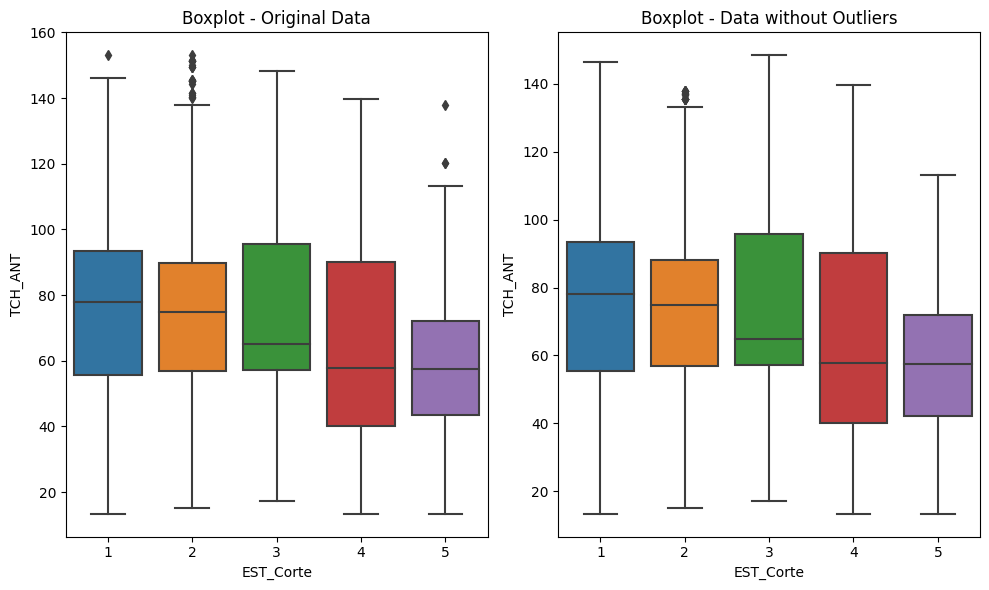

In [ ]:
# Plot boxplots for the original data and data without outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=Group_by_variable, y=column_to_check_outliers, data=data_all)
plt.title('Boxplot - Original Data')

plt.subplot(1, 2, 2)
sns.boxplot(x=Group_by_variable, y=column_to_check_outliers, data=data_all_without_outliers)
plt.title('Boxplot - Data without Outliers')

plt.tight_layout()

# Save the plot as a PNG file with 350 dpi
plt.savefig(os.path.join(out_path, f'07_all_data_monthly_boxplot_safra_{CropSeason}.png'), dpi=350)

plt.show()

#### Exporting as table

In [ ]:
# Define the output path to save monthly BH data
all_data_without_outliers_path = os.path.join(out_path, f'07_all_data_monthly_without_outliers_safra_{CropSeason}.csv')
all_data_without_outliers_path

'/content/drive/MyDrive/Colab Notebooks/01_SugarcaneYieldPrediction/02_usinas_all/07_outliers_analysis/07_all_data_monthly_without_outliers_safra_2223.csv'

In [ ]:
# Save results as table
data_all_without_outliers.to_csv(all_data_without_outliers_path, encoding='utf-8', index=False)
print('Dowanloaded to: ', all_data_without_outliers_path)

Dowanloaded to:  /content/drive/MyDrive/Colab Notebooks/01_SugarcaneYieldPrediction/02_usinas_all/07_outliers_analysis/07_all_data_monthly_without_outliers_safra_2223.csv
